In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from ipynb.fs.full.Funciones_basicas import *
from ipynb.fs.full.Algoritmos import *
from ipynb.fs.full.Visualizaciones import *

In [2]:
path = '../data/graph_geom_corrected_cycles.csv'
csv_grafo = pd.read_csv(path, sep=';')

geometry = gpd.read_file(path, GEOM_POSSIBLE_NAMES="geometry", KEEP_GEOM_COLUMNS="NO")

path_pesos = '../data/pesos_tapas.csv'
pesos = pd.read_csv(path_pesos)

out = {1003950, 15004, 15131, 1003744, 15190, 1003746, 13730, 1003167, 13731, 13732, 13733, 14062, 1003206, 16503, 13735, 16094, 16095}

S = set()
for index, row in csv_grafo.iterrows():
    origin = row['self']
    dest = row['other']
    if origin not in out and dest not in out:
        S.add(origin)
        S.add(dest)

S = list(S)
id_ = {}; _id = {}; l = 0
for u in S:
    id_[u] = l; _id[l] = u
    l += 1

G = nx.DiGraph()
for index, row in csv_grafo.iterrows():
    origin = row['self']
    dest = row['other']
    if origin not in out and dest not in out:
        G.add_edge(id_[origin], id_[dest])
        
N = l
        
        
###################################################################################################

        
path = '../data/corrected_dijkstra.csv'
csv_grafo = pd.read_csv(path, sep=',')

path_pesos = '../data/pesos_tapas.csv'
pesos = pd.read_csv(path_pesos)

T = nx.DiGraph()
for index, row in csv_grafo.iterrows():
    origin = row['self']
    dest = row['other']
    if origin not in out and dest not in out:
        T.add_edge(id_[origin], id_[dest])

W = [0] * N

for u in range(N):
    if pesos[pesos['ID_tapa'] == _id[u]].shape[0] >= 1:  ## tomamos primera columna con el id, si no hay peso = 0
        W[u] = pesos[pesos['ID_tapa'] == _id[u]].iloc[0]['per_predio']

In [3]:
ids = [15671, 13934, 13896, 13923, 13949, 15996, 14104, 13932, 131454, 14791, 14930, 15487, 15720]
tested_ids = [id_[u] for u in ids]
tested_ids

[3876, 2149, 2113, 2140, 2164, 4201, 2319, 2150, 274, 3002, 3141, 3692, 3929]

In [4]:
set_ids = set(tested_ids)

V = [0] * N
Q = deque(); Q.append(744)
order = []

while set_ids:
    u = Q.pop()
    
    if u in set_ids:
        order.append(u)
        set_ids.remove(u)
        
    for v in G.predecessors(u):
        if not V[v]:
            Q.append(v)
            V[v] = 1

print(order)

[2149, 2319, 2164, 2150, 2140, 3141, 274, 3876, 3002, 3692, 2113, 4201, 3929]


In [5]:
V = [0] * N

sizes = []; sizes_red = []

for u in order[::-1]:
    
    S = [0 for u in range(N)]
    for v in range(N):
        if not V[v]:
            _, S[v] = get_size_weight(G, W, V, v)
    
    sizes.append(get_size(G, V, u)); sizes_red.append(get_size_precalc(G, S, V, u))
    V, _ = visit(G, V, u)

[365, 333, 91, 214, 750, 353, 761, 152, 158, 232, 264, 252, 651]


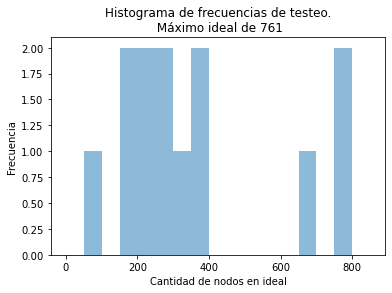

In [6]:
print(sizes)
plot_sizes(sizes)

[234, 190, 62, 33, 289, 215, 378, 97, 81, 167, 156, 155, 420]


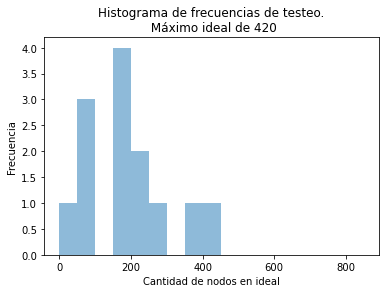

In [7]:
print(sizes_red)
plot_sizes(sizes_red)

In [8]:
root = 744 # Nodo de planta (nodo de mayor ideal normal)

def get_size_robust(G, V_, node):
    
    N = len(V_)
    
    if node == root:
        return N
    
    V = [0] * N
    
    ans = 1
    V[root] = 1; Q = deque([root]);
    while Q:
        u = Q.popleft()
        for v in G.predecessors(u):
            if (not V[v]) and v != node:
                V[v] = 1; ans += 1
                Q.append(v)

    return N - ans

In [9]:
perc = []
for u in order:
    s  = get_size(G, [0] * N, u)
    sr = get_size_robust(G, [0] * N, u)
    perc.append(round((s - sr) / s * 100, 3))
    print(s, sr, f"    {round((s - sr) / s * 100, 3)}%")
print()

i = 0
for u in order:
    print(f"{_id[u]}:  {perc[i]}%")
    i += 1

4576 4576     0.0%
252 252     0.0%
296 264     10.811%
232 200     13.793%
324 310     4.321%
166 146     12.048%
2502 290     88.409%
1110 1100     0.901%
750 750     0.0%
295 214     27.458%
91 10     89.011%
333 324     2.703%
365 316     13.425%

13934:  0.0%
14104:  0.0%
13949:  10.811%
13932:  13.793%
13923:  4.321%
14930:  12.048%
131454:  88.409%
15671:  0.901%
14791:  0.0%
15487:  27.458%
13896:  89.011%
15996:  2.703%
15720:  13.425%


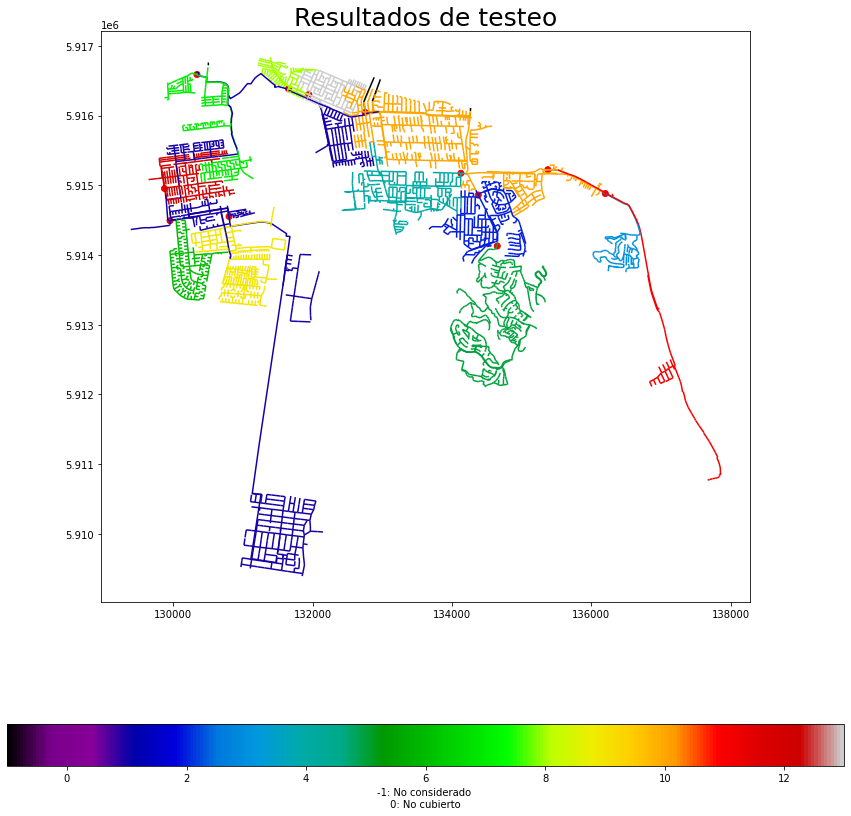

In [10]:
plot_sample_no_intersections(G, [0] * N, order[::-1], geometry, _id, "plot.png")